
<font size="4" style="color:red;"> **IMPORTANT: ** When submitting this notebook as homework, make sure you Only modify cells which have the following comment</font>

```python
# modify this cell
```



## Setup Notebook

In [27]:
%pylab inline
from scipy import *
from numpy.linalg import norm
from math import sqrt,sin,cos
import pandas as pd
import numpy as np
from numpy import arange,array,ones,linalg

Populating the interactive namespace from numpy and matplotlib


/root/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['power', 'f', 'arccos', 'show_config', 'sin', 'log2', 'arctanh', 'fft', 'cos', 'sqrt', '__version__', 'test', 'log', 'log10', 'arcsin']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Below is a **helper function** that outputs a predicted value from a regression fit:

In [28]:
def f(x, reg):
    return reg[0]+ x*reg[1]

# Regression

It is now your turn to try out all of the above code. For this exercise you will measure the relationship between hours studyig and student grades for a simulated dataset. Below is a scatter plot of the data.

(1000, 2)


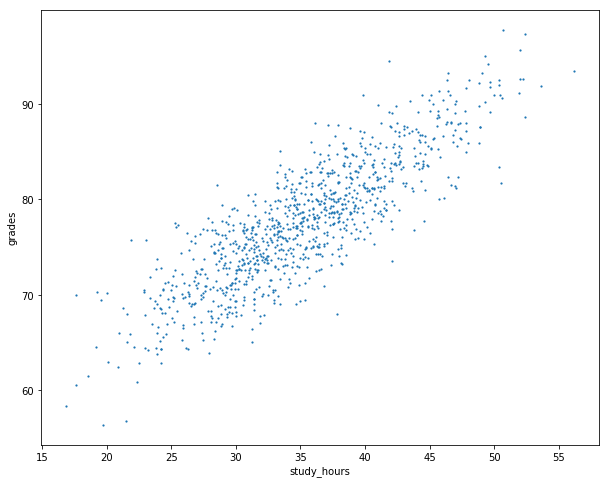

In [29]:
data = pd.read_csv('data/hw_regression_data.csv')
print data.shape
data.head()

ax= data.plot(kind='scatter',s=1.4,x="study_hours",y="grades",figsize=[10,8]);

## Exercise 1: Get Averages

Write a function, **get_averages**, that:
1. For all data points round the student's study hours to the nearest whole number.
2. Compute the mean grade for each rounded whole number of study hours.

The function should return a pandas dataframe of the mean grades for each existing rounded whole number. The beginning of the panda dataframe is provided for you below:

<font  style="color:blue"> * **Code:** *</font>
```python
grade_means = get_averages(data)

print type( grade_means )
print grade_means.shape
print grade_means.columns 
grade_means.head()
```

<font  style="color:magenta"> * **Output:** *</font>
```
<class 'pandas.core.frame.DataFrame'>
(38, 1)
Index([u'grades'], dtype='object')
```
<img src="data/reg_ex_table.png"  style="width: 190px;"/>

In [30]:
# modify this cell

def get_averages(data):
    # input: the HW's dataset
    # output: a pandas dataframe yielding the mean grade for each rounded number of study hours
    data.study_hours = data.study_hours.round()
    data1 = data.rename(columns={'study_hours': 'round_study_hours'})
    data1.groupby(['round_study_hours']).mean()
    return data1.groupby(['round_study_hours']).mean()
    
    #
    # YOUR CODE HERE
    #


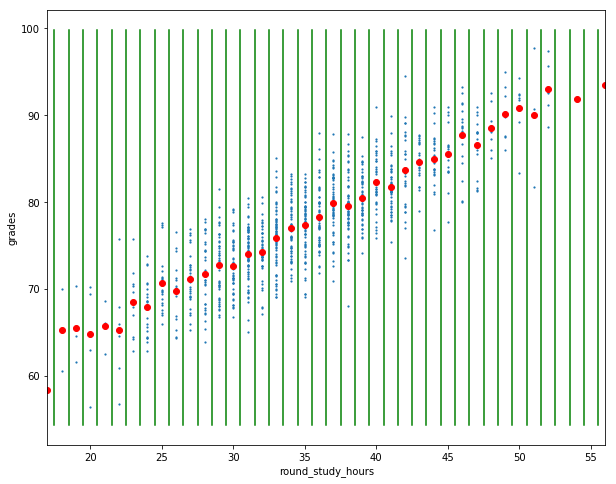

In [31]:
# check student function
grade_means = get_averages(data)

assert grade_means.shape == (38, 1)
assert str(type(grade_means)) == "<class 'pandas.core.frame.DataFrame'>"

try: assert grade_means.columns[0] == "grades"
except: raise ValueError('the column in "grade_means" must be named grades')

try: assert sum(abs( grade_means.tail()["grades"].values - \
               np.array([ 90.77739,90.02272,92.97258,91.87963,93.48365])    )) < 10**-4
except: raise ValueError('some values are incorrect in grade_means')
 

# plot Graph
ax= data.plot(kind='scatter',s=1.4,x="study_hours",y="grades",figsize=[10,8]);
grade_means.plot(y='grades',style='ro', ax=ax,legend=False)
_xlim = xlim()
_ylim =ylim()
for _x in arange(_xlim[0]+0.5,_xlim[1],1):
    plot([_x,_x],[_ylim[0],_ylim[1]],'g')

#
# AUTOGRADER TEST - DO NOT REMOVE
#


## Exercise 2: Simple Linear Regression

Write a function, **do_regression**, that performs linear regression to return 
$ \;
 {\bf w} = \begin{pmatrix}
 w_0\\
 w_1
 \end{pmatrix}
$
for the equation:

$$
\text{grades}= w_0 + w_1 \cdot \text{study_hours}
$$

** *Hint* **: Use the function `linalg.lstsq` 


<font  style="color:blue"> * **Code:** *</font>
```python
w = do_regression(data)
print type(w)
print w.shape
```

<font  style="color:magenta"> * **Output:** *</font>
```
<type 'numpy.ndarray'>
(2,)
```

In [32]:
# modify this cell

def do_regression(data):
    # input: the HW's dataset
    # output: a numpy array yielding w=(w0,w1) from linear regression
    x = data['study_hours'].values
    y = data['grades'].values
    A = np.array([x, np.ones(len(x))])
    w1 = np.linalg.lstsq(A.T,y)[0]
    A.shape,y.shape
    return w1
print do_regression(data)
   
 

[ 48.15539754   0.83759347]


In [33]:
# check student function
w1_hw = do_regression(data)
assert str(type(w1_hw)) ==  "<type 'numpy.ndarray'>"
assert w1_hw.shape == (2,)
assert abs(w1_hw[0] - 48.0694704904) < 10**-5

# plot Means
print w1_hw
ax= data.plot(kind='scatter',s=1.4,x="study_hours",y="grades",figsize=[10,8]);
x0,x1=xlim()
print x0, x1
ax.plot([x0,x1],[f(x0,w1_hw),f(x1,w1_hw)],'k');

#
# AUTOGRADER TEST - DO NOT REMOVE
#


AssertionError: 

## Exercise 3: Reversed Regression

Write a function, **reverse_regression**, that again performs linear regression to return 
$ \;
 {\bf w} = \begin{pmatrix}
 w_0\\
 w_1
 \end{pmatrix}
$
but this time for:

$$
\text{study_hours}= w_0 + w_1 \cdot \text{grades}
$$


<font  style="color:blue"> * **Code:** *</font>
```python
w = reverse_regression(data)
print type(w)
print w.shape
```

<font  style="color:magenta"> * **Output:** *</font>
```
<type 'numpy.ndarray'>
(2,)
```

In [34]:
# modify this cell

def reverse_regression(data):
    # input: the HW's dataset
    # output: a numpy array yielding w=(w0,w1) for the reversed linear regression
    x = data['grades'].values
    y = data['study_hours'].values
    A = np.array([x, np.ones(len(x))])
    w1 = np.linalg.lstsq(A.T,y)[0]
    A.shape,y.shape
    return w1  
print reverse_regression(data)
   

[-31.93937849   0.86453964]


In [35]:
# check answer
w2_hw = reverse_regression(data)
assert str(type(w2_hw)) ==  "<type 'numpy.ndarray'>"
assert w2_hw.shape == (2,)
assert abs(w2_hw[0] - -31.85141332) < 10**-5

# plot graph
ax= data.plot(kind='scatter',s=1.4,x="study_hours",y="grades",figsize=[10,8]);
x0,x1=xlim()
ax.plot([x0,x1],[f(x0,w1_hw),f(x1,w1_hw)],'k');
y0,y1=ylim()
ax.plot([f(y0,w2_hw),f(y1,w2_hw)],[y0,y1],'r');

#
# AUTOGRADER TEST - DO NOT REMOVE
#


AssertionError: 

# Regression to the Mean

### Excercises

It is now your turn to do regression on a dataset. Consider $1000$ datapoints with random variables $x$ and $y$ both sampled from a normal (gaussian) distribution:
$$ x,y \text{ ~ } \mathcal{N}(0,1)  $$

Notice that the graph below looks like a blob, with no clear relationship between  $x$ and $y$. This leads intuitively to the idea that $x$ and $y$ are independent from each other. In this particualr case (not always true) this intuition is correct, $x$ and $y$ are mathematically independent variables.

If we were to try to perform linear regression on this data (the <font style="color:red">red line</font>), we would find rather boring results:
$$ y = 0 + 0 \cdot x = 0 $$

This is due to the fact that $y$ has mean 0 and is independent of $x$. What do you think would happen if we did:
$$ y-x = w_0 + w_1 \cdot x $$

Is $y$ independent of $x$? Will the graph look like a blob? Will $y-x = 0 ?$ Lets find out!

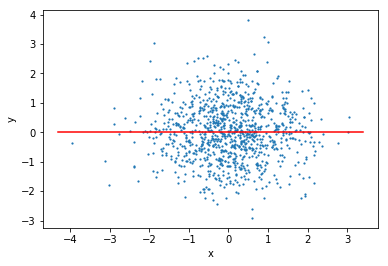

In [10]:
HW=pd.read_csv('data/gauss_R2.csv')

ax= HW.plot(kind='scatter',s=1.4,x="x",y="y");
x0,x1=xlim()
ax.plot([x0,x1],[0,0],'r');

## Exercise 1: Put $\;y-x\;$ in Dataframe

This first exercise's goal is to familarize you with the [pandas](http://pandas.pydata.org/pandas-docs/version/0.15.2/tutorials.html) package.

Your task is to make a new column on the pandas dataframe `HW` where each element of the new column is equal to $y-x$. Write a function **y_minus_x** that will create the new column, make sure the column's name is "y-x" . Notice that the function DOES NOT return any output, this is because the `HW` dataframe will be edited "in-place".

<font  style="color:blue"> * **Code:** *</font>
```python
print y_minus_x(HW)
print HW.shape
print HW.columns
HW.head()
```

<font  style="color:magenta"> * **Output:** *</font>
```
None
(1000, 3)
Index([u'x', u'y', u'y-x'], dtype='object')
```
<img src="data/reg_mean_pic.png"  style="width: 220px;"/>

In [11]:
def y_minus_x(HW):
    # input: the HW's dataset
    # output: there is NO OUTPUT
    HW['y-x'] = HW['y'] - HW['x']
    #
    # YOUR CODE HERE
    #


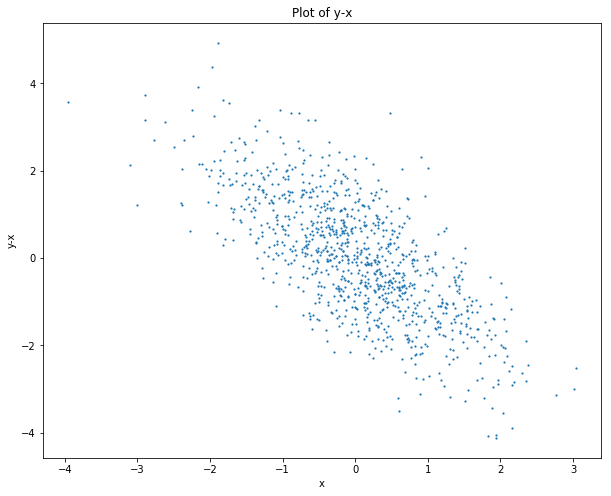

In [12]:
# Check Answer
HW=pd.read_csv('data/gauss_R2.csv')
assert y_minus_x(HW) == None 
assert HW.shape == (1000, 3)
assert all( HW.columns.values == array(['x', 'y', 'y-x']) )
assert sum(abs( array(HW["y-x"])[0:10] - \
               array([0.36236278,-2.37726552,-0.36501525,0.05449746,-0.27705517,1.80807383,-2.07001209,
                      -0.67536514,0.67519959,  0.97277652])   )) < 10**-5

# Create Graph
ax= HW.plot(kind='scatter',s=1.4,x="x",y="y-x",figsize=[10,8], title="Plot of y-x");

#
# AUTOGRADER TEST - DO NOT REMOVE
#


Notice in the graph that there is a clear negative relationship between $y-x$ and $x$. As you might have guessed, $y-x$ and $x$ are NOT independent. 

We can use linear regression to find the relationship between $y-x$ and $x$ but before we do that, we can derive this mathematicaly. Remember from before, we showed:
$$ y = 0 + 0 \cdot x $$

Now, we're doing linear regression to find:
$$ \;\;\;\;\;\;y-x = w_0 + w_1 \cdot x $$
$$ \iff y = w_0 + (1+w_1) \cdot x $$

Comparing the two eqations for $y$, you can deduce that $w_0=0$ and $w_1=-1$ . Now lets see how close our sampled data is to the true equation for the distribution!

$\;$
<font style="color:red">*Technical Note:*</font> The derivation is mathematically sound only because $y-x$ is also a gaussian random variable. The sum of two gaussians is a gaussian. Under the laws of linear regression this ensures both the regressors of $y$ and $y-x$ have zero expected error.

## Exercise 2: Simple Linear Regression

Write a function, **do_regression**, that performs linear regression to return 
$ \;
 {\bf w} = \begin{pmatrix}
 w_0\\
 w_1
 \end{pmatrix}
$
for the equation:

$$
\text{y-x}= w_0 + w_1 \cdot \text{x}
$$


<font  style="color:blue"> * **Code:** *</font>
```python
w = do_regression(HW)
print type(w)
print w.shape
```

<font  style="color:magenta"> * **Output:** *</font>
```
<type 'numpy.ndarray'>
(2,)
```

In [13]:
# modify this cell

def do_regression(HW):
    # input: the HW's dataset
    # output: a numpy array yielding w=(w0,w1) from linear regression
    A=np.array(HW['x'])
    A=np.array([ones(len(A)),A])
    y=np.array(HW['y-x'])
    A.shape,y.shape
    w = linalg.lstsq(A.T,y)[0] # finding the optimal parameters
    return w
    
    #
    # YOUR CODE HERE
    #


LINEAR REGRESSION EQUATION:
y-x = 0.02 + -1.01 x


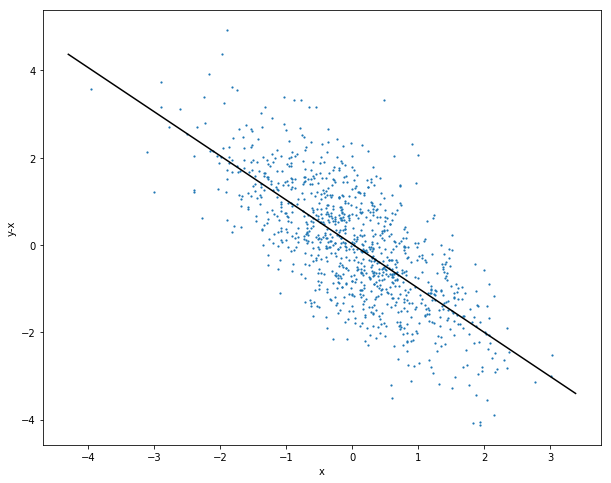

In [14]:
# Check Answer
w_hw = do_regression(HW)
assert str(type(w_hw)) == "<type 'numpy.ndarray'>"
assert w_hw.shape == (2,)
assert sum(abs(w_hw[0] - 0.02173387)) < 10**-5

# Plot Graph
print "LINEAR REGRESSION EQUATION:"
print "y-x = {:.2f} + {:.2f} x".format(w_hw[0],w_hw[1])
ax= HW.plot(kind='scatter',s=1.4,x="x",y="y-x",figsize=[10,8]);
x0,x1=xlim()
ax.plot([x0,x1],[f(x0,w_hw),f(x1,w_hw)],'k');

#
# AUTOGRADER TEST - DO NOT REMOVE
#
